<a href="https://colab.research.google.com/github/prasadanvekar/elvtrdocs/blob/main/Assignment4_lending_club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of Columns: 151
Column Names: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verifica

<ipython-input-1-c7bf109ee57d>:61: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


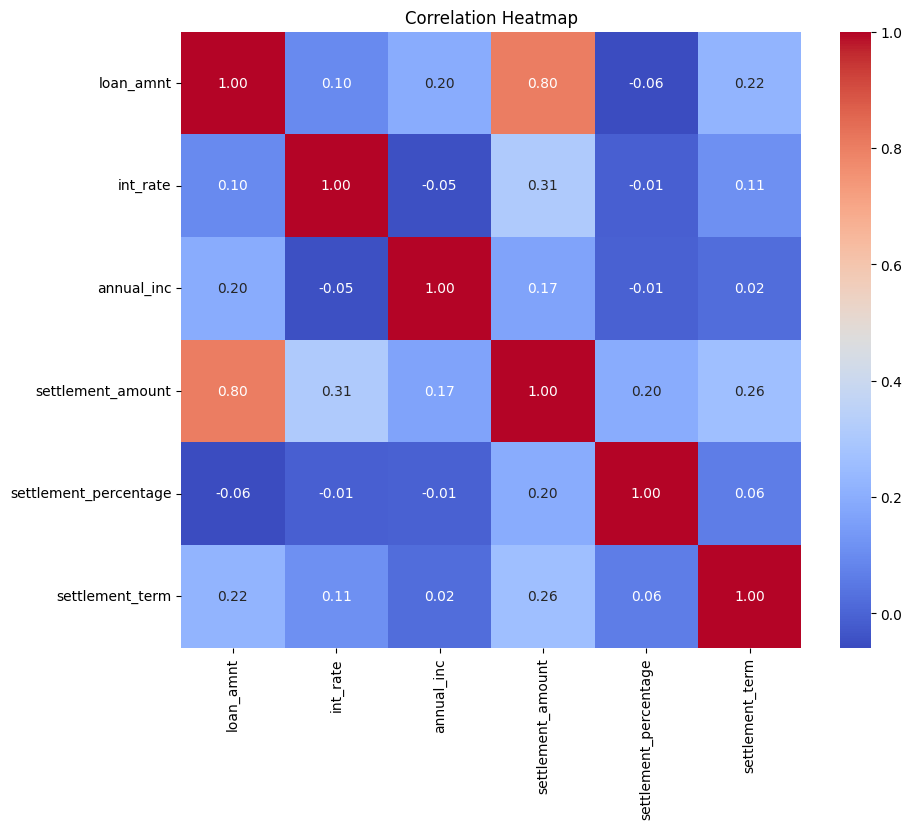

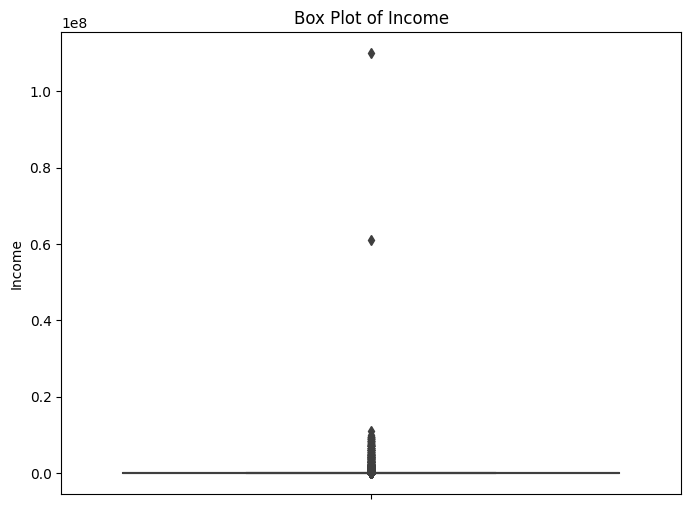

Inspect Data - Display first few(5) rows of dataset:
         id  loan_amnt        term  int_rate grade emp_length  annual_inc  \
0  68407277     3600.0   36 months     13.99     C  10+ years     55000.0   
1  68355089    24700.0   36 months     11.99     C  10+ years     65000.0   
2  68341763    20000.0   60 months     10.78     B  10+ years     63000.0   
3  66310712    35000.0   60 months     14.85     C  10+ years    110000.0   
4  68476807    10400.0   60 months     22.45     F    3 years    104433.0   

  verification_status loan_status disbursement_method debt_settlement_flag  \
0        Not Verified  Fully Paid                Cash                    N   
1        Not Verified  Fully Paid                Cash                    N   
2        Not Verified  Fully Paid                Cash                    N   
3     Source Verified     Current                Cash                    N   
4     Source Verified  Fully Paid                Cash                    N   

  settlement_st

In [1]:
###############################################################################################
# Assignment#4: Lending Club.                                                                 #
# Objective : apply essential data cleaning and transformation techniques to prepare the data #
# for further analysis and modeling.                                                          #
# Author: Prasad S Anvekar                                                                    #
# Date: 28 Dec 2023                                                                           #
###############################################################################################

# Importing the required libraries

import os
import pandas as pd
import sklearn as sk
import json
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Data Path where the file are located.

DATA_PATH = "accepted_2007_to_2018Q4.csv"

# Error Hanlding for Data Path and File not found scenarios.

if os.path.exists(DATA_PATH):
    # Read from file if we've already downloaded the data.
    with open(DATA_PATH) as f:
        data = pd.read_csv('accepted_2007_to_2018Q4.csv', low_memory=False)
else:
     print("File not found!")

# Data exploration & Preprocessing
# understanding the data

# Get the number of columns
num_columns = data.shape[1]

# Display column names
column_names = data.columns.tolist()

print(f"Number of Columns: {num_columns}")
print(f"Column Names: {column_names}")

# Original Data:
# To view the first 5 rows of the datasets
print('Original Data - Display first few(5) rows of dataset:')
print(data.head())

# importing selected columns for this assignments
# Specify the columns you want to import
numeric_columns = ['id','loan_amnt', 'int_rate', 'annual_inc','settlement_amount','settlement_term','settlement_percentage']
character_columns = ['term', 'grade', 'emp_length','verification_status','loan_status','settlement_status','disbursement_method', 'debt_settlement_flag']

# Read the CSV file with selected columns
selected_columns = numeric_columns + character_columns
df = pd.read_csv(DATA_PATH, usecols=selected_columns, low_memory=False)

# Create a heatmap to visualize the correlation between numeric values')
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Create a box plot to visualize the distribution of income
plt.figure(figsize=(8,6))
sns.boxplot(y='annual_inc',data=data)
plt.title('Box Plot of Income')
plt.ylabel('Income')
plt.show()

# To view the first 5 rows of the datasets
print('Inspect Data - Display first few(5) rows of dataset:')
print(df.head())

# To view the last 5 rows of the datasets
print('Inspect Data - Display last few(5) rows of dataset:')
print(df.tail())

# Check for any missing values
print('Inspect any missing values:')
print(df.isnull().sum())

# To view the column details of the datasets. To choose the right target variable.
print('Inspect Data - Describe the column in the dataset:')
print(df.describe())

# to check the data types
print('Inspect Data - check data types:')
print(df.dtypes)

# Handling the Missing Values:
# for this assignment will be choosing 3 numeric - loan_amnt,int_rate,settlement_amount
# and 3 character fields - settlement_status,debt_settlement_flag,disbursement_method
# Replacing missing values with a mean (loan_amt, int_rate)
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
df[['loan_amnt', 'int_rate']] = imputer.fit_transform(df[['loan_amnt', 'int_rate']])

# Replacing missing values with a constant
imputer_1 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
df[['settlement_amount','settlement_term','settlement_percentage']] = imputer_1.fit_transform(df[['settlement_amount','settlement_term','settlement_percentage']])

# Replacing missing values with a constant
imputer_2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='N')
df[['settlement_status','debt_settlement_flag','verification_status' ]] = imputer_2.fit_transform(df[['settlement_status','debt_settlement_flag','verification_status']])

# Replacing missing values with a constant
#imputer_3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=None)
#data[['disbursement_method']] = imputer_3.fit_transform(data[['disbursement_method']])

print("Missing data replaced with constant & mean: ")
print(df.head())

# dropping the rows with null values
df.dropna(subset=['annual_inc'], inplace=True)

# Encoding categorical variables (grade, loan_status)
le = LabelEncoder()
df['grade'] = le.fit_transform(df['grade'])
df['loan_status'] = le.fit_transform(df['loan_status'])

print("one-hot Encoding categorical data: ")
print(df)

# Scaling numerical features (Annual Income) using StandardScaler:
scaler = StandardScaler()
df[['annual_inc']] = scaler.fit_transform(df[['annual_inc']])

#Display the preprocessed and cleansed data
print("Scaling numnerical features using StandardScaler: ")
print(df)

# Check for any missing values post Data Processing
print('Inspect any missing values post data imputation:')
print(df.isnull().sum())

# write the transformed data to a new csv file for further processing & analysis.
df.to_csv('accepted_2007_to_2018Q4_modified.csv', index=False)

